<a href="https://colab.research.google.com/github/cbsobral/ml-fies/blob/Diego/Module00_LoadingData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Module 00 - Loading data and creating training and test sets

In this first module, we perform the following steps:

1. Load the data from Google Drive in two parts (the file is too big to load at once);
2. Exclude irrelevant variables or variables with too many missing values;
3. Rename variables in English and possibly with shorter names;
4. Divide training and test set.

### 1 - Load the data in two parts:

In [ ]:
import pandas as pd

url_a = 'https://drive.google.com/file/d/1prPbFSiXFTHmTHzXTGxy4HrtRxXUHhce/view?usp=sharing'
path_a = 'https://drive.google.com/uc?export=download&id='+url_a.split('/')[-2]
base_df_a = pd.read_excel(path_a)
base_df_a.shape

(309999, 37)

In [2]:
url_b = 'https://drive.google.com/file/d/1nGckSszPPifPvR3o5FeYaKArUYbfjHGn/view?usp=sharing'
path_b = 'https://drive.google.com/uc?export=download&id='+url_b.split('/')[-2]
base_df_b = pd.read_excel(path_b)
base_df_b.shape

(327823, 37)

In [3]:
complete_set = base_df_a.append(base_df_b)
complete_set.shape

(637822, 37)

### 2 - Renaming variables

In [11]:
#Let's use 365 days as the initial limit for default categories
#To be added in the pipeline
complete_set=complete_set.assign(default=1*(complete_set["nu_dias_atraso"]>365))

In [12]:
new_names ={"NU_ANO_SEMESTRE_INSCRICAO":"semester_enroll",
            "SG_SEXO":"gender",
            "DS_OCUPACAO":"occupation",
            "DS_ESTADO_CIVIL":"marital_status", 
            "VL_RENDA_PESSOAL_BRUTA_MENSAL": "personal_income", 
            "ST_ENSINO_MEDIO_ESCOLA_PUBLICA": "public_hs",
            "NO_CURSO": "degree",
            "QT_SEMESTRE_CONCLUIDO": "completed_semesters",
            "VL_SEMESTRE_ATUAL": "tuition_current",
            "VL_FINANCIADO_SEMESTRE": "loan_value_sem",
            "fase_contrato": "contract_phase",
            "vl_divida": "total_debt",            
            "VL_AVALIACAO_IGC": "igc",
            "VL_FAIXA_CPC": "cpc",
            "VL_FAIXA_CC": "cc",
            "QT_SEMESTRE_FINANCIAMENTO": "sem_funded",
            "QT_MEMBRO": "fam_size",
            "VL_RENDA_PER_CAPITA":"income_pc",
            "NU_PERCENTUAL_COMPROMETIMENTO":"inc_prop",
            "VL_TOTAL_FINANCIAMENTO":"loan_value",
            "VL_LIMITE_GLOBAL":"loan_limit",
            "dt_inicio_cont":"date_contract"
}

complete_set = complete_set.rename(index=str, columns=new_names)
complete_set.dtypes

semester_enroll                            int64
gender                                    object
occupation                                object
marital_status                            object
VL_RENDA_FAMILIAR_BRUTA_MENSAL           float64
personal_income                          float64
NO_MUNICIPIO                              object
SG_UF                                     object
DS_RACA_COR                               object
public_hs                                 object
NU_ANO_CONCLUSAO_ENSINO_MEDIO            float64
NU_SEMESTRE_REFERENCIA                     int64
SG_UF_CURSO                               object
degree                                    object
igc                                      float64
cpc                                      float64
cc                                       float64
QT_SEMESTRES_CURSO                         int64
qt_semester                                int64
sem_funded                                 int64
QT_MESES_FINANC_SEME

In [13]:
#Analysis of this feature necessary
complete_set["degree"].describe()

count      637822
unique        377
top       DIREITO
freq        98327
Name: degree, dtype: object

### 3 - Cleaning Dataset

In [14]:
import datetime as dt

complete_set_clean = complete_set.drop(['NO_MUNICIPIO',"SG_UF","VL_SEMESTRE_SEM_DESCONTO"], axis = 1)
complete_set_clean["date_contract"]= complete_set_clean["date_contract"].map(dt.datetime.toordinal)

Some variables are better interprerted as categories.

In [15]:
complete_set_clean = complete_set_clean.astype({'semester_enroll':str,'igc':str,'cpc':str,'cpc':str,'cc':str,'ANO_NASC':str})

### Add atributes

In [16]:
#Will be included in the pipeline
#Recode ocupacao
complete_set_clean=complete_set_clean.assign(student=1*(complete_set["occupation"]=="Estudante"))
complete_set_clean=complete_set_clean.assign(default=int(delay>=365))

NameError: ignored

In [17]:
complete_set_clean.dtypes

semester_enroll                    object
gender                             object
occupation                         object
marital_status                     object
VL_RENDA_FAMILIAR_BRUTA_MENSAL    float64
personal_income                   float64
DS_RACA_COR                        object
public_hs                          object
NU_ANO_CONCLUSAO_ENSINO_MEDIO     float64
NU_SEMESTRE_REFERENCIA              int64
SG_UF_CURSO                        object
degree                             object
igc                                object
cpc                                object
cc                                 object
QT_SEMESTRES_CURSO                  int64
qt_semester                         int64
sem_funded                          int64
QT_MESES_FINANC_SEMESTRE_ATUAL      int64
fam_size                          float64
income_pc                         float64
VL_SEMESTRE_COM_DESCONTO          float64
tuition_current                   float64
inc_prop                          

In [18]:
complete_set_clean = complete_set_clean.dropna(subset=['semester_enroll','gender',
                                                 "occupation",
                                                 'marital_status',
                                                 'DS_RACA_COR',
                                                 'public_hs',
                                                 'SG_UF_CURSO',
                                                 'degree',
                                                 'igc','cpc','cc',
                                                 'contract_phase','ANO_NASC'])

In [19]:
# One hot encode with get_dummies
import pandas as pd
#complete_set = pd.concat((complete_set,pd.get_dummies(complete_set.semester_enroll),
 #                        pd.get_dummies(complete_set.gender),
  #                       pd.get_dummies(complete_set.marriage_status),
   #                      pd.get_dummies(complete_set.SG_UF),
    #                     pd.get_dummies(complete_set.DS_RACA_COR),
     #                    pd.get_dummies(complete_set.ST_ENSINO_MEDIO_ESCOLA_PUBLICA),
      #                   pd.get_dummies(complete_set.NO_CURSO),
       #                  pd.get_dummies(complete_set.fase_contrato)),1)

In [20]:
#Remove objects that are not numeric or categorical


complete_set_cat = complete_set_clean.select_dtypes(include=['object'])
complete_set_num = complete_set_clean.select_dtypes(exclude=['object'])


### Pipeline

Functions that will be used to tranform our dataset

In [21]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
complete_set_cat_encoded = ordinal_encoder.fit_transform(complete_set_cat)

In [22]:
#One hot enconder
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
complete_set_cat_transformed = cat_encoder.fit_transform(complete_set_cat)

In [23]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [24]:
#Add atributes. For now, just occupation
# column index to add atributes
col_names = "occupation", "nu_dias_atraso"
occupation, delay = [ complete_set_clean.columns.get_loc(c) for c in col_names] # get the column indices
occupation,delay
complete_set.values[:,2][:10]=="Estudante"

array([False, False,  True,  True,  True, False, False,  True,  True,
        True])

In [25]:
#Apagar
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self,cutoff =  365,status=False):# no *args or **kargs
        self.delay_cutoff =  cutoff
        self.status=status 
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        default = pd.cut(X[:, delay],bins=[-np.inf,self.delay_cutoff,np.inf],labels=[0,1])
        if self.status:
            is_student = 1*(X[:,occupation]=='Estudante')
            return np.c_[X, default,is_student]
        else:
            return np.c_[X, default]

In [26]:
#Apagar
attribs_adder = CombinedAttributesAdder()
transformed = attribs_adder.transform(complete_set_clean.values)

In [27]:
#apagar
transformed= pd.DataFrame(
    transformed,
    columns=list(complete_set_clean.columns)+["default"],
    index=complete_set_clean.index)
transformed.head()

,semester_enroll,gender,occupation,marital_status,VL_RENDA_FAMILIAR_BRUTA_MENSAL,personal_income,DS_RACA_COR,public_hs,NU_ANO_CONCLUSAO_ENSINO_MEDIO,NU_SEMESTRE_REFERENCIA,SG_UF_CURSO,degree,igc,cpc,cc,QT_SEMESTRES_CURSO,qt_semester,sem_funded,QT_MESES_FINANC_SEMESTRE_ATUAL,fam_size,income_pc,VL_SEMESTRE_COM_DESCONTO,tuition_current,inc_prop,NU_PERCENT_SOLICITADO_FINANC,loan_value_sem,VL_FINANC_RECURSO_ALUNO,loan_value,loan_limit,date_contract,contract_phase,nu_dias_atraso,total_debt,ANO_NASC,default,student,default
0,12014,F,Vendedor e prestador de serviÃ§os do comÃ©rcio...,Solteiro,728.74,728.74,P,S,10,12015,AL,PEDAGOGIA,3.0,nan,nan,8,2,8,6,2,364.37,1683.18,1683.18,71.95,100,1683.18,0,13465.4,15730.8,735355,Amortizacao,0,14549.7,1991,0,0,0
1,12013,F,Outros trabalhadores de serviÃ§os diversos,Solteiro,553.35,553.35,P,S,7,12015,MG,LETRAS - INGLÊS,3.0,2.0,3.0,6,4,6,6,1,553.35,2650.5,2650.5,67.47,100,2650.5,0,15903,16800.8,734912,Amortizacao,0,12139.8,1990,0,0,0
2,22014,F,Estudante,Solteiro,5962.49,0,P,N,13,12015,MG,MEDICINA,3.0,3.0,4.0,12,1,12,6,5,1192.5,26810.8,26810.8,352.14,100,26810.8,0,321730,377937,735457,Utilizacao,0,397350,1996,0,1,0
3,12012,F,Estudante,Solteiro,21671.7,0,B,N,8,12015,MG,MEDICINA,3.0,3.0,4.0,12,6,12,6,4,5417.94,32065.3,32065.3,75.51,100,32065.3,0,384784,368181,734582,Utilizacao,0,434902,1991,0,1,0
4,22011,F,Estudante,Solteiro,1000,0,B,S,9,12015,RN,PSICOLOGIA,3.0,4.0,4.0,10,7,10,6,3,333.33,5190,5190,204.9,100,2595,2595,51900,25612.5,734403,Amortizacao,682,27518.9,1992,1,1,1


In [28]:
complete_set_num.head()

,VL_RENDA_FAMILIAR_BRUTA_MENSAL,personal_income,NU_ANO_CONCLUSAO_ENSINO_MEDIO,NU_SEMESTRE_REFERENCIA,QT_SEMESTRES_CURSO,qt_semester,sem_funded,QT_MESES_FINANC_SEMESTRE_ATUAL,fam_size,income_pc,VL_SEMESTRE_COM_DESCONTO,tuition_current,inc_prop,NU_PERCENT_SOLICITADO_FINANC,loan_value_sem,VL_FINANC_RECURSO_ALUNO,loan_value,loan_limit,date_contract,nu_dias_atraso,total_debt,default,student
0,728.74,728.74,10.0,12015,8,2,8,6,2.0,364.37,1683.18,1683.18,71.95,100,1683.18,0.0,13465.44,15730.80,735355,0,14549.68,0,0
1,553.35,553.35,7.0,12015,6,4,6,6,1.0,553.35,2650.50,2650.50,67.47,100,2650.50,0.0,15903.00,16800.75,734912,0,12139.80,0,0
2,5962.49,0.00,13.0,12015,12,1,12,6,5.0,1192.50,26810.85,26810.85,352.14,100,26810.85,0.0,321730.20,377937.00,735457,0,397349.62,0,1
3,21671.74,0.00,8.0,12015,12,6,12,6,4.0,5417.94,32065.32,32065.32,75.51,100,32065.32,0.0,384783.84,368181.00,734582,0,434901.80,0,1
4,1000.00,0.00,9.0,12015,10,7,10,6,3.0,333.33,5190.00,5190.00,204.90,100,2595.00,2595.0,51900.00,25612.50,734403,682,27518.91,1,1


In [29]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])
complete_num_tr = num_pipeline.fit_transform(complete_set_num)


In [30]:
#Full pipeline
from sklearn.compose import ColumnTransformer

num_attribs = list(complete_set_num)
cat_attribs = list(complete_set_cat)

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])
complete_set_prepared = full_pipeline.fit_transform(complete_set_clean)

In [31]:
complete_set_prepared[:1]

<1x741 sparse matrix of type '<class 'numpy.float64'>'
	with 34 stored elements in Compressed Sparse Row format>

### 4 - Creating a training and a test set

In this section we will create the training and test set using the function *train_test_split* from Scikit-Learn. Two important considerations about our choice:

* Our dataset is a sample provided by the Brazilian Governent and will not be updated. Therefore, we chose not to be concerned about future splits with updated data;

* Our data includes 637,822 instances. We assume it is big enough and do not employ stratified sampling.

In [32]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(complete_set_prepared, test_size=0.2, random_state=42)

### 5 - Cleaning Data 

### 6 - Visualisation

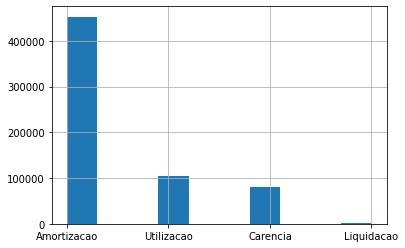

In [33]:
complete_set["contract_phase"].hist()

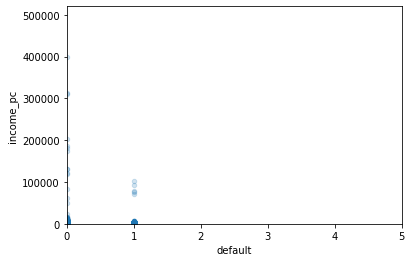

In [34]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

complete_set.plot(kind="scatter", x="default", y="income_pc",
             alpha=0.2)
plt.axis([0, 5, 0, 520000])
plt.show()